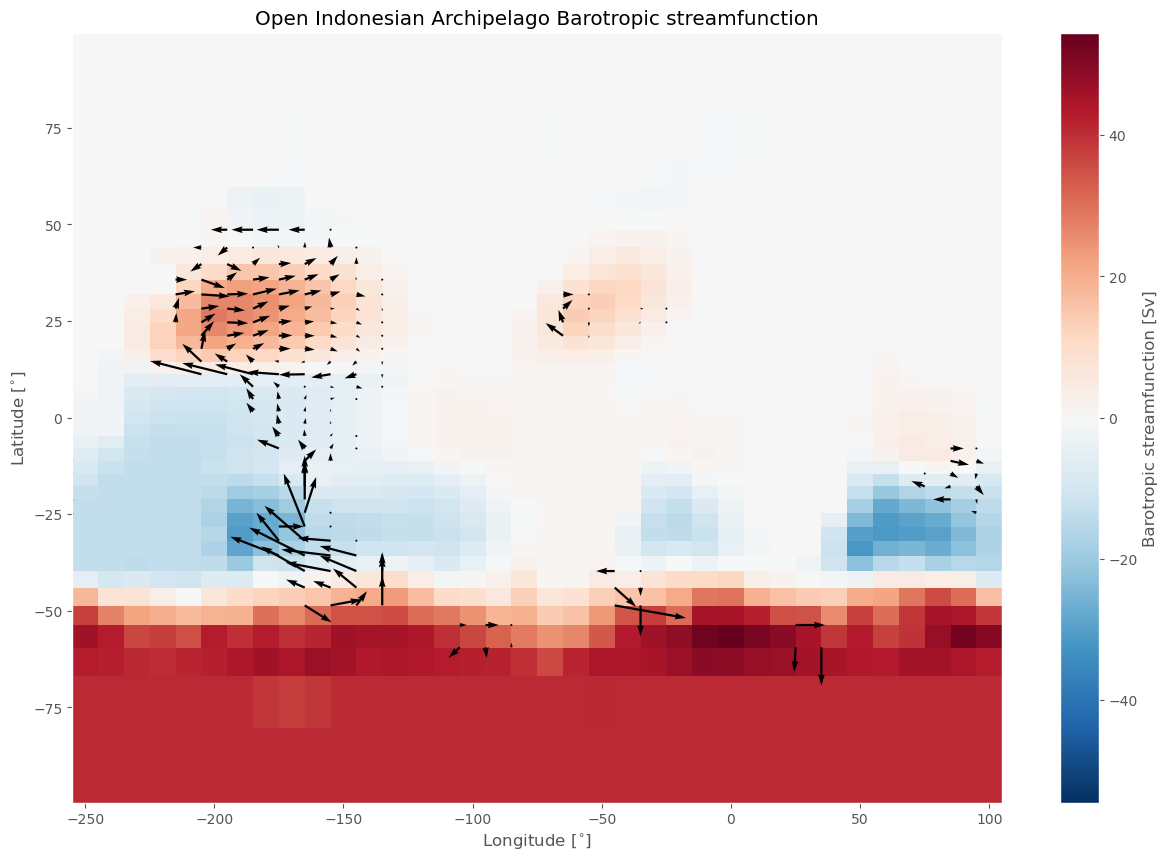

In [37]:
# import libs
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# open data
open2D = xr.open_dataset("../model_outputs/open/fields_biogem_2d.nc")
open3D = xr.open_dataset("../model_outputs/open/fields_biogem_3d.nc")
closed2D = xr.open_dataset("../model_outputs/close/fields_biogem_2d.nc")
closed3D = xr.open_dataset("../model_outputs/close/fields_biogem_3d.nc")

# pick ocean properties
u_open = open3D["phys_ocn_u"].isel(time=-1).isel(zt=-1) # m/s
u_close = closed3D["phys_ocn_u"].isel(time=-1).isel(zt=-1) # m/s
v_open = open3D["phys_ocn_v"].isel(time=-1).isel(zt=-1) # m/s
v_close = closed3D["phys_ocn_v"].isel(time=-1).isel(zt=-1) # m/s

barot_stream_open = open2D["phys_psi"].isel(time=-1) # Sv
barot_stream_close = closed2D["phys_psi"].isel(time=-1) # Sv

sss_open = open2D["ocn_sur_sal"].isel(time=-1) # Sv
sss_close = closed2D["ocn_sur_sal"].isel(time=-1) # Sv

glob_opsi_open = open2D["phys_opsi"].isel(time=-1) # Sv
glob_opsi_close = closed2D["phys_opsi"].isel(time=-1) # Sv

# anomaly calculation
u_anom = u_close - u_open 
v_anom = v_close - v_open

barot_anom = barot_stream_close - barot_stream_open

sss_anom = sss_close - sss_open

glob_opsi_anom = glob_opsi_close - glob_opsi_open

##
plt.figure(figsize=(15,10))
barot_stream_open.plot()
plt.xlabel(r"Longitude $[^{\circ}$]")
plt.ylabel(r"Latitude $[^{\circ}$]")
plt.title("Open Indonesian Archipelago Barotropic streamfunction")
lon = u_open.lon
lat = u_open.lat
lon, lat = np.meshgrid(lon, lat)
plt.quiver(lon, lat, u_open, v_open)

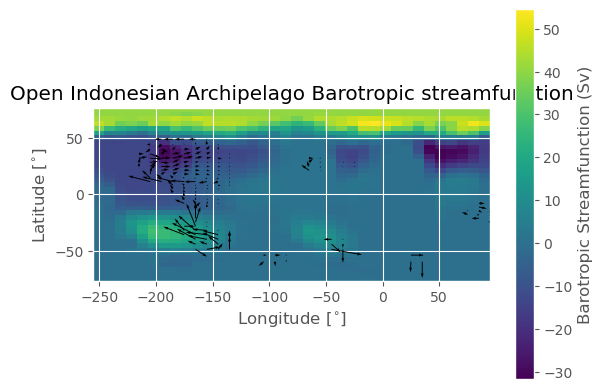

In [38]:
# Create a masked array to replace NaN values with black
barot_stream_open_masked = np.ma.masked_array(barot_stream_open, np.isnan(barot_stream_open))

# Plot the filled barotropic streamfunction
cmap = plt.get_cmap("viridis")  # You can choose a different colormap if needed
plt.imshow(barot_stream_open_masked, cmap=cmap, origin="upper", extent=[lon.min(), lon.max(), lat.min(), lat.max()])
plt.colorbar(label="Barotropic Streamfunction (Sv)")
plt.xlabel(r"Longitude $[^{\circ}$]")
plt.ylabel(r"Latitude $[^{\circ}$]")
plt.title("Open Indonesian Archipelago Barotropic streamfunction")

# Add the quiver plot for ocean velocity components
plt.quiver(lon, lat, u_open, v_open)

plt.show()

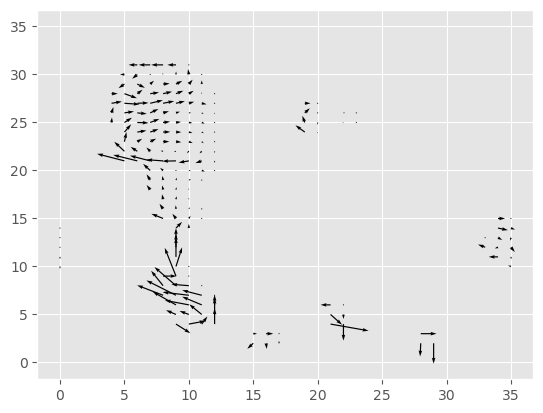